<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jun  8 04:00:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [2]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import logging
import pandas as pd
import traceback # Import the traceback module

# Configure logging
logging.basicConfig(level=logging.INFO)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configuration parameters
BLOCK_LENGTH = 128
INFO_BITS = 64
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
NUM_SAMPLES_TRAIN = 10000
NUM_TRIALS_PERF = 1000
SNR_RANGE_AWGN = np.linspace(0, 5, 11)
LIST_SIZES = [1, 8, 16]

#Part 2: Polar Code Generator and Modulation
####################################################
#Latest Polar Code Generator
class PolarCodeGenerator:
    def __init__(self, N, K, crc_type='CRC-7'):
        self.N = N
        self.K = K
        self.R = K / N
        self.crc_type = crc_type
        self.crc_polynomials = {'CRC-7': (np.array([1, 0, 0, 1, 1, 0, 0, 1]), 7)}

        # Initialize _crc_length
        if crc_type in self.crc_polynomials:
            self._crc_length = self.crc_polynomials[crc_type][1]
        else:
            self._crc_length = 0

        self.K_crc = self.K + self._crc_length
        self.frozen_set, self.info_set = self._get_frozen_and_info_sets()

    def generate_info_bits(self):
        return np.random.randint(2, size=self.K)

    def polar_encode(self, info_bits):
       info_bits_with_crc = self.compute_crc(info_bits)
       if len(info_bits_with_crc) != self.K_crc:
        raise ValueError("Length mismatch in CRC encoding.")

       u = np.zeros(self.N, dtype=int)
       u[list(self.info_set)] = info_bits_with_crc  # Ensure info_set is properly sized
       codeword = self._polar_transform(u)
       return codeword

    def _polar_transform(self, u):
        N = len(u)
        if N == 1:
            return u
        else:
            half_N = N // 2
            x_upper = self._polar_transform(u[:half_N])
            x_lower = self._polar_transform(u[half_N:])
            codeword = np.concatenate([(x_upper + x_lower) % 2, x_lower])
            return codeword

    def compute_crc(self, info_bits):
        if self.crc_type not in self.crc_polynomials:
            return info_bits
        polynomial, length = self.crc_polynomials[self.crc_type]
        data_for_crc = np.copy(info_bits)
        crc_bits = self.crc(data_for_crc, polynomial, length)
        return np.concatenate((info_bits, crc_bits))

    def crc(self, data, polynomial, length):
        data = np.concatenate((data, np.zeros(length, dtype=int)))
        for i in range(len(data) - length):
            if data[i] == 1:
                data[i:i+length+1] ^= polynomial
        return data[-length:]

    def _get_frozen_and_info_sets(self):
    # Calculate the total number of information bits including CRC
     total_info_bits = self.K + self._crc_length

     reliabilities = [0.5] * self.N
    # Sort indices based on reliability (this is a placeholder, more complex reliability calculations are needed for actual polar codes)
     reliability_order = np.argsort(reliabilities)
    # Select the indices for information bits and CRC
     info_indices = sorted(reliability_order[:total_info_bits])
    # The remaining indices are frozen bits
     frozen_indices = sorted(set(range(self.N)) - set(info_indices))
     return frozen_indices, info_indices




def bpsk_modulate(bits):
    bits = np.array(bits, dtype=int)
    return 2 * bits - 1

#Part 3: Dataset Preparation and Channel Simulation
############################################################
#latest
class EnhancedRNNDecoder(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, num_layers=2):
        super(EnhancedRNNDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers  # Ensure this is defined
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x_reshaped = x.unsqueeze(1)  # Assuming sequence_length = 1
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x_reshaped, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)
###########################################################
class EnhancedChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def simulate(self, signal, snr_db):
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))
        noise = noise_std * np.random.randn(*signal.shape)
        return signal + noise

def prepare_polar_dataset(polar_code_gen, num_samples, snr_db=5, channel_type='AWGN'):
    channel_simulator = EnhancedChannelSimulator(channel_type=channel_type)
    X, y = [], []

    for _ in range(num_samples):
        info_bits = polar_code_gen.generate_info_bits()
        encoded_signal = polar_code_gen.polar_encode(info_bits)
        modulated_signal = bpsk_modulate(encoded_signal)
        received_signal = channel_simulator.simulate(modulated_signal, snr_db)
        X.append(received_signal)
        y.append(info_bits)

    return np.array(X), np.array(y)

def save_dataset_to_csv(X, y, filename='dataset.csv'):
    data = np.hstack((X, y))
    columns = [f'received_{i}' for i in range(X.shape[1])] + [f'bit_{j}' for j in range(y.shape[1])]
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(filename, index=False)
    logging.info(f"Dataset saved to {filename}")

#Part 4
class EnhancedRNNDecoder(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, num_layers=2):
        super(EnhancedRNNDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers  # Ensure this is defined
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x_reshaped = x.unsqueeze(1)  # Assuming sequence_length = 1

        # Ensure h0 and c0 are created with the correct device and shape
        # Use self.num_layers for multiple RNN layers
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.rnn(x_reshaped, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

class DecoderTrainer:
    def __init__(self, model, learning_rate):
        self.model = model
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=50, batch_size=32):
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

        train_losses, val_losses = [], []

        for epoch in range(epochs):
            epoch_loss = 0
            self.model.train()

            for X_batch, y_batch in loader:
                X_batch = X_batch.view(-1, BLOCK_LENGTH)
                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            train_loss = epoch_loss / len(loader)
            train_losses.append(train_loss)
            logging.info(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

            if X_val is not None and y_val is not None:
                self.model.eval()
                with torch.no_grad():
                    val_output = self.model(X_val.view(-1, BLOCK_LENGTH))
                    val_loss = self.criterion(val_output, y_val).item()
                    val_losses.append(val_loss)
                    logging.info(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

        return train_losses, val_losses if X_val is not None else None

#Part 5: SCL Decoder

class PolarCodeDecoder:
    def __init__(self, N, K, list_size, crc_poly=None):
        self.N = N
        self.K = K
        self.list_size = list_size
        self.frozen_set = self._get_frozen_set()
        self.info_set = sorted(list(set(range(N)) - set(self.frozen_set)))
        self._crc_polynomial = crc_poly[0] if crc_poly else None
        self._crc_length = crc_poly[1] if crc_poly else 0

    def _get_frozen_set(self):
        return set(range(self.K, self.N))

    def decode(self, received_llrs):
        active_path_indices = list(range(self.list_size))
        self.paths = [[] for _ in range(self.list_size)]
        self.path_metrics = [0.0] * self.list_size
        self.hard_decisions = [np.zeros(self.N, dtype=int) for _ in range(self.list_size)]
        self.llrs = [np.copy(received_llrs) for _ in range(self.list_size)]

        final_active_path_indices = self._recursive_decode(active_path_indices, 0, self.N)
        best_path_index = np.argmin(self.path_metrics)
        return self.hard_decisions[best_path_index][list(self.info_set)]

    def _recursive_decode(self, active_path_indices, bit_index, block_size):
        if block_size == 1:
            pass  # Base case logic
        else:
            half_size = block_size // 2
            for path_idx in active_path_indices:
                llr_f = self._f(self.llrs[path_idx][bit_index:bit_index + half_size], self.llrs[path_idx][bit_index + half_size:bit_index + block_size])
                self.llrs[path_idx][bit_index:bit_index + half_size] = llr_f

            active_paths_after_u1 = self._recursive_decode(active_path_indices, bit_index, half_size)

            for path_idx in active_paths_after_u1:
                u1_decisions = self.hard_decisions[path_idx][bit_index:bit_index + half_size]
                llr_g = self._g(self.llrs[path_idx][bit_index:bit_index + half_size], self.llrs[path_idx][bit_index + half_size:bit_index + block_size], u1_decisions)
                self.llrs[path_idx][bit_index + half_size:bit_index + block_size] = llr_g

            return self._recursive_decode(active_paths_after_u1, bit_index + half_size, half_size)

    def _f(self, L1, L2):
        return np.minimum(np.abs(L1), np.abs(L2)) * np.sign(L1) * np.sign(L2)

    def _g(self, L1, L2, u1):
        return L2 + (1 - 2 * u1) * L1

    def _compute_crc_for_info_bits(self, info_bits):
        return np.array([])

#Part 6: Plotting Functions

def plot_training_validation(train_losses, val_losses):
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Training Loss')
    if val_losses:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_ber_bler_comparison(snr_range, rnn_results, scl_results_all, list_sizes):
    plt.figure(figsize=(12, 6))

    # BER Plot
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN')
    for size, scl_results in scl_results_all.items():
        plt.plot(snr_range, [result['BER'] for result in scl_results], label=f'SCL, List Size {size}')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN')
    for size, scl_results in scl_results_all.items():
        plt.plot(snr_range, [result['BLER'] for result in scl_results], label=f'SCL, List Size {size}')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

def plot_ber_bler_scl(snr_range, scl_results_all, list_sizes):
    plt.figure(figsize=(12, 6))

    # BER Plot for SCL
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    for size in list_sizes:
        if not scl_results_all[size]:
            continue
        plt.plot(snr_range, [result['BER'] for result in scl_results_all[size]], label=f'SCL, List Size {size}', marker='x', linestyle='--')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('SCL Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot for SCL
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    for size in list_sizes:
        if not scl_results_all[size]:
            continue
        plt.plot(snr_range, [result['BLER'] for result in scl_results_all[size]], label=f'SCL, List Size {size}', marker='x', linestyle='--')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('SCL Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

    #for RNN decoder plots
def plot_ber_bler_rnn(snr_range, rnn_results):
    plt.figure(figsize=(12, 6))

    # BER Plot for RNN
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('RNN Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot for RNN
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('RNN Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

def plot_ber_bler_rnn(snr_range, rnn_results):
    plt.figure(figsize=(12, 6))

    # BER Plot for RNN
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('RNN Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot for RNN
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('RNN Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

def performance_comparison(rnn_trainer, polar_code_gen, snr_range, channel_type, list_sizes, num_trials):
    results = {'SNR': snr_range, 'BER_RNN': [], 'BLER_RNN': []}
    scl_results = {size: [] for size in list_sizes}

    channel_simulator = EnhancedChannelSimulator(channel_type)

    for snr in snr_range:
        rnn_bit_errors = 0
        rnn_block_errors = 0
        scl_bit_errors = {size: 0 for size in list_sizes}
        scl_block_errors = {size: 0 for size in list_sizes}

        for _ in range(num_trials):
            info_bits = polar_code_gen.generate_info_bits()
            encoded_signal = polar_code_gen.polar_encode(info_bits)
            modulated_signal = bpsk_modulate(encoded_signal)
            simulated_signal = channel_simulator.simulate(modulated_signal, snr)

            # RNN decoding
            rnn_input = torch.FloatTensor(simulated_signal).to(device).view(1, BLOCK_LENGTH)
            rnn_output = (rnn_trainer.model(rnn_input).detach().cpu().numpy().squeeze() > 0.5).astype(int)
            rnn_bit_errors += np.sum(info_bits != rnn_output)
            rnn_block_errors += np.any(info_bits != rnn_output)

            # SCL decoding
            snr_linear = 10**(snr/10)
            received_llrs = 4 * snr_linear * simulated_signal
            for size in list_sizes:
                decoder = PolarCodeDecoder(N=polar_code_gen.N, K=polar_code_gen.K, list_size=size)
                scl_output = decoder.decode(received_llrs)
                scl_bit_errors[size] += np.sum(info_bits != scl_output)
                scl_block_errors[size] += np.any(info_bits != scl_output)

        results['BER_RNN'].append(rnn_bit_errors / (num_trials * INFO_BITS))
        results['BLER_RNN'].append(rnn_block_errors / num_trials)

        for size in list_sizes:
            scl_results[size].append({'SNR': snr, 'BER': scl_bit_errors[size] / (num_trials * INFO_BITS), 'BLER': scl_block_errors[size] / num_trials})

    return results, scl_results
#Part 7
#main() function
def main():
    try:
        # Set up the device
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Configuration parameters
        BLOCK_LENGTH = 128
        INFO_BITS = 64
        LEARNING_RATE = 1e-3
        EPOCHS = 50
        BATCH_SIZE = 32
        NUM_SAMPLES_TRAIN = 10000
        NUM_TRIALS_PERF = 1000
        SNR_RANGE_AWGN = np.linspace(0, 5, 11)
        LIST_SIZES = [1, 8, 16]

        logging.basicConfig(level=logging.INFO)

        # Polar code generator initialization
        polar_code_gen = PolarCodeGenerator(N=BLOCK_LENGTH, K=INFO_BITS)
        rnn_model = EnhancedRNNDecoder(BLOCK_LENGTH, INFO_BITS).to(device)
        rnn_trainer = DecoderTrainer(rnn_model, LEARNING_RATE)

        logging.info(f"Code Rate: {polar_code_gen.R}")

        # Generate and save dataset
        X_raw, y_raw = prepare_polar_dataset(
            polar_code_gen, num_samples=NUM_SAMPLES_TRAIN, snr_db=5.0, channel_type='AWGN'
        )
        save_dataset_to_csv(X_raw, y_raw, 'awgn_dataset.csv')

        # Reshape and split data, moving to the device
        X_tensor = torch.FloatTensor(X_raw).view(-1, BLOCK_LENGTH).to(device)
        y_tensor = torch.FloatTensor(y_raw).view(-1, INFO_BITS).to(device)

        # Split data
        train_size = int(0.8 * X_tensor.shape[0])
        train_X = X_tensor[:train_size]
        train_y = y_tensor[:train_size]
        val_X = X_tensor[train_size:]
        val_y = y_tensor[train_size:]

        # RNN Model Training
        train_losses, val_losses = rnn_trainer.train(
            train_X, train_y, X_val=val_X, y_val=val_y, epochs=EPOCHS, batch_size=BATCH_SIZE
        )

        # Performance comparison
        rnn_perf_results, scl_perf_results = performance_comparison(
            rnn_trainer, polar_code_gen, SNR_RANGE_AWGN, 'AWGN', LIST_SIZES, NUM_TRIALS_PERF
        )

        # Plot results
        plot_training_validation(train_losses, val_losses)
        plot_ber_bler_rnn(SNR_RANGE_AWGN, rnn_perf_results)
       # plot_ber_bler_comparison(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results, LIST_SIZES)
        plot_ber_bler_comparison(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results, LIST_SIZES)
        plot_ber_bler_scl(SNR_RANGE_AWGN, scl_perf_results, LIST_SIZES)
        # Example Confusion Matrix
        y_true_example = train_y[:100].cpu().numpy()
        rnn_input_example = train_X[:100]
        rnn_output_prob_example = rnn_trainer.model(rnn_input_example).cpu().detach().numpy()
        rnn_output_example = (rnn_output_prob_example > 0.5).astype(int)
        y_pred_example = rnn_output_example.squeeze()
        plot_confusion_matrix(y_true_example.flatten(), y_pred_example.flatten(), title='Confusion Matrix')

        logging.info("🎉 AWGN Channel Simulation Complete!")

    except Exception as e:
        logging.error(f"Simulation Error: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()



ERROR:root:Simulation Error: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-4-808723bfe65e>", line 505, in main
    rnn_perf_results, scl_perf_results = performance_comparison(
                                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-4-808723bfe65e>", line 444, in performance_comparison
    scl_output = decoder.decode(received_llrs)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-4-808723bfe65e>", line 241, in decode
    final_active_path_indices = self._recursive_decode(active_path_indices, 0, self.N)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-4-808723bfe65e>", line 254, in _recursive_decode
    active_paths_after_u1 = self._recursive_decode(active_path_indices, bit_index, half_size)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-4-808723bfe65e>", line 2

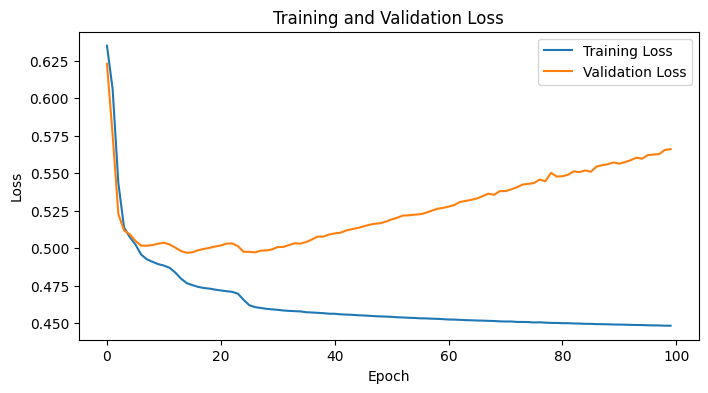

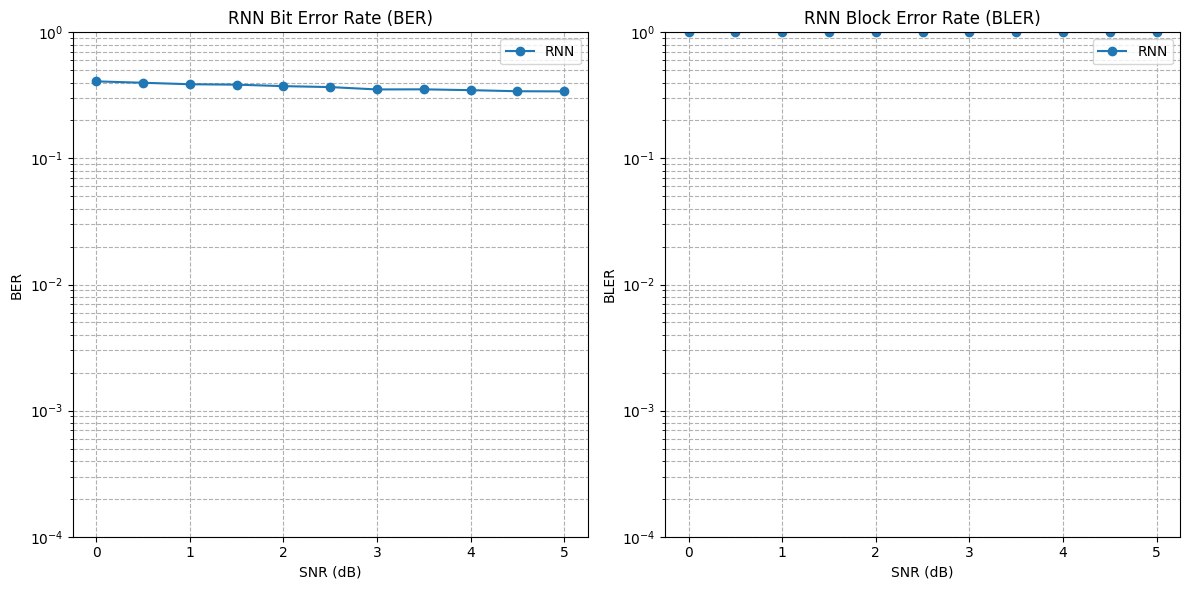

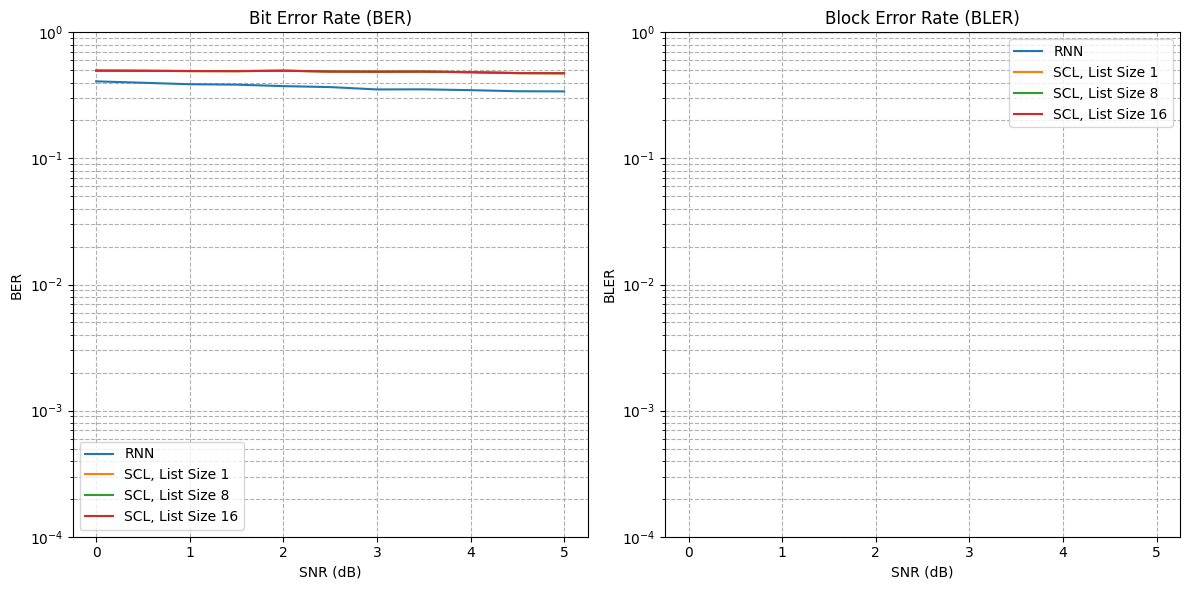

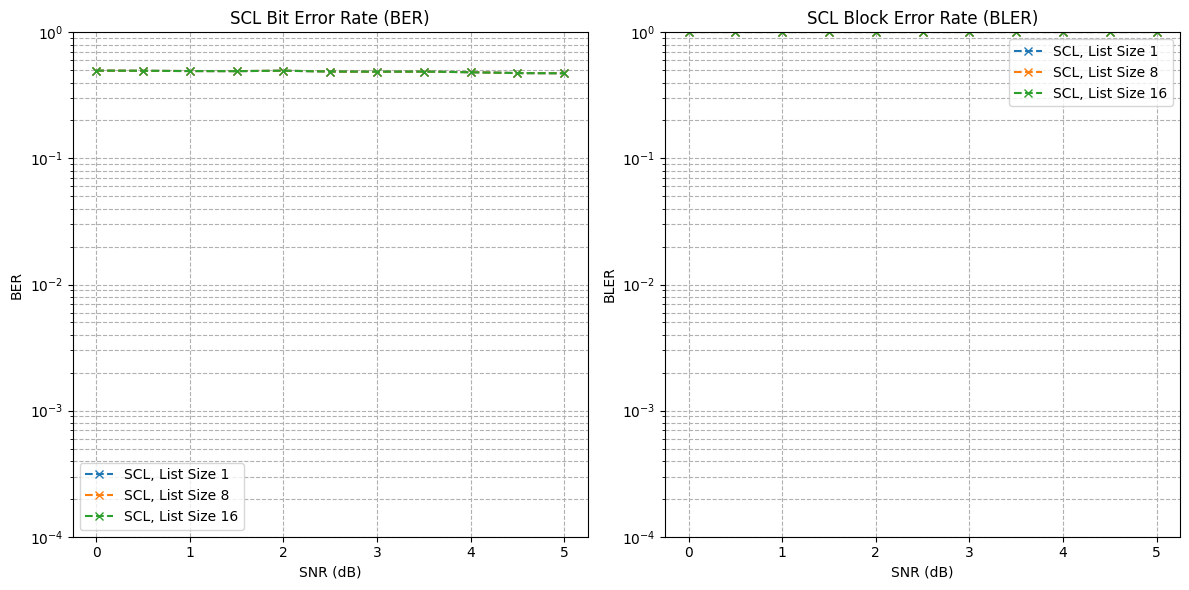

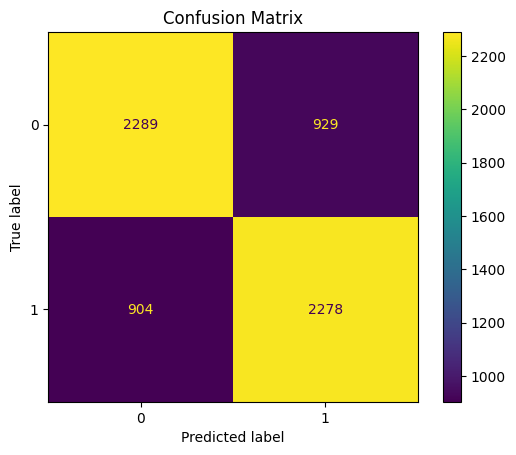

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import logging
import pandas as pd
import traceback # Import the traceback module

# Configure logging
logging.basicConfig(level=logging.INFO)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configuration parameters
BLOCK_LENGTH = 128
INFO_BITS = 64
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 32
NUM_SAMPLES_TRAIN = 100000
NUM_TRIALS_PERF = 1500
SNR_RANGE_AWGN = np.linspace(0, 5, 11)
LIST_SIZES = [1, 8, 16]

#Part 2: Polar Code Generator and Modulation
####################################################
#Latest Polar Code Generator
class PolarCodeGenerator:
    def __init__(self, N, K, crc_type='CRC-7'):
        self.N = N
        self.K = K
        self.R = K / N
        self.crc_type = crc_type
        self.crc_polynomials = {'CRC-7': (np.array([1, 0, 0, 1, 1, 0, 0, 1]), 7)}

        # Initialize _crc_length
        if crc_type in self.crc_polynomials:
            self._crc_length = self.crc_polynomials[crc_type][1]
        else:
            self._crc_length = 0

        self.K_crc = self.K + self._crc_length
        self.frozen_set, self.info_set = self._get_frozen_and_info_sets()

    def generate_info_bits(self):
        return np.random.randint(2, size=self.K)

    def polar_encode(self, info_bits):
       info_bits_with_crc = self.compute_crc(info_bits)
       if len(info_bits_with_crc) != self.K_crc:
        raise ValueError("Length mismatch in CRC encoding.")

       u = np.zeros(self.N, dtype=int)
       u[list(self.info_set)] = info_bits_with_crc  # Ensure info_set is properly sized
       codeword = self._polar_transform(u)
       return codeword

    def _polar_transform(self, u):
        N = len(u)
        if N == 1:
            return u
        else:
            half_N = N // 2
            x_upper = self._polar_transform(u[:half_N])
            x_lower = self._polar_transform(u[half_N:])
            codeword = np.concatenate([(x_upper + x_lower) % 2, x_lower])
            return codeword

    def compute_crc(self, info_bits):
        if self.crc_type not in self.crc_polynomials:
            return info_bits
        polynomial, length = self.crc_polynomials[self.crc_type]
        data_for_crc = np.copy(info_bits)
        crc_bits = self.crc(data_for_crc, polynomial, length)
        return np.concatenate((info_bits, crc_bits))

    def crc(self, data, polynomial, length):
        data = np.concatenate((data, np.zeros(length, dtype=int)))
        for i in range(len(data) - length):
            if data[i] == 1:
                data[i:i+length+1] ^= polynomial
        return data[-length:]

    def _get_frozen_and_info_sets(self):
    # Calculate the total number of information bits including CRC
     total_info_bits = self.K + self._crc_length

     reliabilities = [0.5] * self.N
    # Sort indices based on reliability (this is a placeholder, more complex reliability calculations are needed for actual polar codes)
     reliability_order = np.argsort(reliabilities)
    # Select the indices for information bits and CRC
     info_indices = sorted(reliability_order[:total_info_bits])
    # The remaining indices are frozen bits
     frozen_indices = sorted(set(range(self.N)) - set(info_indices))
     return frozen_indices, info_indices


def bpsk_modulate(bits):
    bits = np.array(bits, dtype=int)
    return 2 * bits - 1

#Part 3: Dataset Preparation and Channel Simulation
############################################################
#latest
class EnhancedRNNDecoder(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, num_layers=2):
        super(EnhancedRNNDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers  # Ensure this is defined
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x_reshaped = x.unsqueeze(1)  # Assuming sequence_length = 1
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x_reshaped, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)
###########################################################
class EnhancedChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def simulate(self, signal, snr_db):
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))
        noise = noise_std * np.random.randn(*signal.shape)
        return signal + noise

def prepare_polar_dataset(polar_code_gen, num_samples, snr_db=5, channel_type='AWGN'):
    channel_simulator = EnhancedChannelSimulator(channel_type=channel_type)
    X, y = [], []

    for _ in range(num_samples):
        info_bits = polar_code_gen.generate_info_bits()
        encoded_signal = polar_code_gen.polar_encode(info_bits)
        modulated_signal = bpsk_modulate(encoded_signal)
        received_signal = channel_simulator.simulate(modulated_signal, snr_db)
        X.append(received_signal)
        y.append(info_bits)

    return np.array(X), np.array(y)

def save_dataset_to_csv(X, y, filename='dataset.csv'):
    data = np.hstack((X, y))
    columns = [f'received_{i}' for i in range(X.shape[1])] + [f'bit_{j}' for j in range(y.shape[1])]
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(filename, index=False)
    logging.info(f"Dataset saved to {filename}")

#Part 4
class EnhancedRNNDecoder(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, num_layers=2):
        super(EnhancedRNNDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers  # Ensure this is defined
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x_reshaped = x.unsqueeze(1)  # Assuming sequence_length = 1

        # Ensure h0 and c0 are created with the correct device and shape
        # Use self.num_layers for multiple RNN layers
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.rnn(x_reshaped, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

class DecoderTrainer:
    def __init__(self, model, learning_rate):
        self.model = model
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=50, batch_size=32):
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

        train_losses, val_losses = [], []

        for epoch in range(epochs):
            epoch_loss = 0
            self.model.train()

            for X_batch, y_batch in loader:
                X_batch = X_batch.view(-1, BLOCK_LENGTH)
                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            train_loss = epoch_loss / len(loader)
            train_losses.append(train_loss)
            logging.info(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

            if X_val is not None and y_val is not None:
                self.model.eval()
                with torch.no_grad():
                    val_output = self.model(X_val.view(-1, BLOCK_LENGTH))
                    val_loss = self.criterion(val_output, y_val).item()
                    val_losses.append(val_loss)
                    logging.info(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

        return train_losses, val_losses if X_val is not None else None

    def evaluate(self, X_test, y_test):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_test.view(-1, BLOCK_LENGTH))
            predicted = (outputs > 0.5).int()
            correct = (predicted == y_test).sum().item()
            total = y_test.numel()
            accuracy = correct / total
            # Calculate BER and BLER
            bit_errors = torch.sum(predicted != y_test).item()
            block_errors = torch.sum(torch.any(predicted != y_test, dim=1)).item()
            ber = bit_errors / total
            bler = block_errors / X_test.size(0)

        return ber, bler


#Part 5: SCL Decoder

class PolarCodeDecoder:
    def __init__(self, N, K, list_size, crc_poly=None):
        self.N = N
        self.K = K
        self.list_size = list_size
        self.frozen_set = self._get_frozen_set()
        self.info_set = sorted(list(set(range(N)) - set(self.frozen_set)))
        self._crc_polynomial = crc_poly[0] if crc_poly else None
        self._crc_length = crc_poly[1] if crc_poly else 0

    def _get_frozen_set(self):
        # This needs a proper implementation based on polar code construction
        # For now, using a placeholder: first N-K bits are frozen
        return set(range(self.K, self.N))

    def decode(self, received_llrs):
        # Convert received signals to LLRs (Assuming BPSK and AWGN)
        # LLR = 2 * y / sigma^2, where sigma^2 is noise variance.
        # Need SNR to calculate sigma^2. For performance evaluation, LLRs are typically provided.
        # Assuming received_llrs are already in LLR format.

        active_path_indices = list(range(self.list_size))
        self.paths = [[] for _ in range(self.list_size)]
        self.path_metrics = [0.0] * self.list_size # Using sum of absolute LLRs as path metric
        self.hard_decisions = [np.zeros(self.N, dtype=int) for _ in range(self.list_size)]
        self.llrs = [np.copy(received_llrs) for _ in range(self.list_size)]

        # Initialize path metrics
        for path_idx in active_path_indices:
             self.path_metrics[path_idx] = np.sum(np.abs(self.llrs[path_idx]))

        # Start recursive decoding
        final_active_path_indices = self._recursive_decode(active_path_indices, 0, self.N)

        # Select the best path based on path metric (lower is better for sum of abs LLRs)
        # If using CRC, need to check CRC validity first. This implementation doesn't include CRC check in SCL.
        best_path_index = np.argmin([self.path_metrics[i] for i in final_active_path_indices])

        return self.hard_decisions[final_active_path_indices[best_path_index]][list(self.info_set)]

    def _recursive_decode(self, active_path_indices, bit_index, block_size):
        if block_size == 1:
            # Decision step at the leaf nodes
            for path_idx in active_path_indices:
                if self.llrs[path_idx][bit_index] >= 0:
                    self.hard_decisions[path_idx][bit_index] = 0
                else:
                    self.hard_decisions[path_idx][bit_index] = 1
                # Update path metric (negative log-likelihood)
                # More accurate path metric calculation is needed for full SCL with LLRs
                self.path_metrics[path_idx] -= np.abs(self.llrs[path_idx][bit_index])

            # Prune paths if list size is exceeded at the leaf node (not standard SCL but a simplification here)
            # Standard SCL prunes after processing a whole block or sub-block
            if len(active_path_indices) > self.list_size:
                sorted_indices = sorted(active_path_indices, key=lambda i: self.path_metrics[i])
                return sorted_indices[:self.list_size]
            else:
                return active_path_indices

        else:
            half_size = block_size // 2
            # Split step - compute LLRs for the first half (u_1)
            for path_idx in active_path_indices:
                llr_f = self._f(self.llrs[path_idx][bit_index:bit_index + half_size], self.llrs[path_idx][bit_index + half_size:bit_index + block_size])
                self.llrs[path_idx][bit_index:bit_index + half_size] = llr_f

            # Recursively decode the first half
            active_paths_after_u1 = self._recursive_decode(active_path_indices, bit_index, half_size)

            # Split step - compute LLRs for the second half (u_2)
            for path_idx in active_paths_after_u1:
                u1_decisions = self.hard_decisions[path_idx][bit_index:bit_index + half_size]
                llr_g = self._g(self.llrs[path_idx][bit_index:bit_index + half_size], self.llrs[path_idx][bit_index + half_size:bit_index + block_size], u1_decisions)
                self.llrs[path_idx][bit_index + half_size:bit_index + block_size] = llr_g

            # Recursively decode the second half
            active_paths_after_u2 = self._recursive_decode(active_paths_after_u1, bit_index + half_size, half_size)

            # Prune paths after finishing a sub-block
            if len(active_paths_after_u2) > self.list_size:
                sorted_indices = sorted(active_paths_after_u2, key=lambda i: self.path_metrics[i])
                return sorted_indices[:self.list_size]
            else:
                return active_paths_after_u2


    def _f(self, L1, L2):
        # Approximation of log( (1+e^(L1+L2)) / (e^L1 + e^L2) )
        return np.minimum(np.abs(L1), np.abs(L2)) * np.sign(L1) * np.sign(L2)

    def _g(self, L1, L2, u1):
        return L2 + (1 - 2 * u1) * L1

    def _compute_crc_for_info_bits(self, info_bits):
        # This method is not used in the current decode implementation but is part of the class
        return np.array([])

#Part 6: Plotting Functions

def plot_training_validation(train_losses, val_losses):
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Training Loss')
    if val_losses:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_ber_bler_comparison(snr_range, rnn_results, scl_results_all, list_sizes):
    plt.figure(figsize=(12, 6))

    # BER Plot
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN')
    for size, scl_results in scl_results_all.items():
        plt.plot(snr_range, [result['BER'] for result in scl_results], label=f'SCL, List Size {size}')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN')
    for size, scl_results in scl_results_all.items():
        plt.plot(snr_range, [result['BLER'] for result in scl_results], label=f'SCL, List Size {size}')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

def plot_ber_bler_scl(snr_range, scl_results_all, list_sizes):
    plt.figure(figsize=(12, 6))

    # BER Plot for SCL
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    for size in list_sizes:
        if size not in scl_results_all or not scl_results_all[size]:
            continue
        plt.plot(snr_range, [result['BER'] for result in scl_results_all[size]], label=f'SCL, List Size {size}', marker='x', linestyle='--')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('SCL Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot for SCL
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    for size in list_sizes:
        if size not in scl_results_all or not scl_results_all[size]:
            continue
        plt.plot(snr_range, [result['BLER'] for result in scl_results_all[size]], label=f'SCL, List Size {size}', marker='x', linestyle='--')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('SCL Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

    #for RNN decoder plots
def plot_ber_bler_rnn(snr_range, rnn_results):
    plt.figure(figsize=(12, 6))

    # BER Plot for RNN
    plt.subplot(1, 2, 1)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('RNN Bit Error Rate (BER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # BLER Plot for RNN
    plt.subplot(1, 2, 2)
    plt.yscale('log')
    plt.ylim(1e-4, 1)  # Set y-limits
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('RNN Block Error Rate (BLER)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

# Part 7: Performance Evaluation Function
def performance_comparison(rnn_trainer, polar_code_gen, snr_range_db, channel_type, list_sizes, num_trials):
    channel_simulator = EnhancedChannelSimulator(channel_type=channel_type)
    rnn_perf_results = {'BER_RNN': [], 'BLER_RNN': []}
    scl_perf_results = {size: [] for size in list_sizes}

    rnn_model = rnn_trainer.model.to(device) # Ensure model is on the correct device

    for snr_db in snr_range_db:
        logging.info(f"Simulating at SNR: {snr_db} dB")

        total_bits_rnn = 0
        bit_errors_rnn = 0
        total_blocks_rnn = 0
        block_errors_rnn = 0

        total_bits_scl = {size: 0 for size in list_sizes}
        bit_errors_scl = {size: 0 for size in list_sizes}
        total_blocks_scl = {size: 0 for size in list_sizes}
        block_errors_scl = {size: 0 for size in list_sizes}

        for trial in range(num_trials):
            info_bits = polar_code_gen.generate_info_bits()
            encoded_signal = polar_code_gen.polar_encode(info_bits)
            modulated_signal = bpsk_modulate(encoded_signal)
            received_signal = channel_simulator.simulate(modulated_signal, snr_db)

            # RNN Decoding
            with torch.no_grad():
                received_tensor = torch.FloatTensor(received_signal).view(1, -1).to(device)
                rnn_output_prob = rnn_model(received_tensor).cpu().detach().numpy().squeeze()
                rnn_decoded_bits = (rnn_output_prob > 0.5).astype(int)

            total_bits_rnn += INFO_BITS
            bit_errors_rnn += np.sum(rnn_decoded_bits != info_bits)
            total_blocks_rnn += 1
            if not np.array_equal(rnn_decoded_bits, info_bits):
                block_errors_rnn += 1

            # SCL Decoding
            # Convert received signal to LLRs for SCL decoder (assuming BPSK and AWGN)
            # LLR = 2 * y / sigma^2
            snr_linear = 10**(snr_db/10)
            noise_variance = 1 / (2 * snr_linear) # Assuming unit signal power after BPSK
            received_llrs = (2 * received_signal) / noise_variance

            for list_size in list_sizes:
                scl_decoder = PolarCodeDecoder(
                    N=polar_code_gen.N,
                    K=polar_code_gen.K,
                    list_size=list_size,
                    crc_poly=polar_code_gen.crc_polynomials.get(polar_code_gen.crc_type) # Pass CRC info
                )
                scl_decoded_bits = scl_decoder.decode(received_llrs)

                total_bits_scl[list_size] += INFO_BITS
                bit_errors_scl[list_size] += np.sum(scl_decoded_bits != info_bits)
                total_blocks_scl[list_size] += 1
                if not np.array_equal(scl_decoded_bits, info_bits):
                    block_errors_scl[list_size] += 1

        # Calculate BER and BLER for RNN
        rnn_ber = bit_errors_rnn / total_bits_rnn if total_bits_rnn > 0 else 0
        rnn_bler = block_errors_rnn / total_blocks_rnn if total_blocks_rnn > 0 else 0
        rnn_perf_results['BER_RNN'].append(rnn_ber)
        rnn_perf_results['BLER_RNN'].append(rnn_bler)
        logging.info(f"SNR: {snr_db} dB, RNN BER: {rnn_ber:.4e}, BLER: {rnn_bler:.4e}")


        # Calculate BER and BLER for SCL
        for list_size in list_sizes:
            scl_ber = bit_errors_scl[list_size] / total_bits_scl[list_size] if total_bits_scl[list_size] > 0 else 0
            scl_bler = block_errors_scl[list_size] / total_blocks_scl[list_size] if total_blocks_scl[list_size] > 0 else 0
            scl_perf_results[list_size].append({'BER': scl_ber, 'BLER': scl_bler})
            logging.info(f"SNR: {snr_db} dB, SCL List Size {list_size} BER: {scl_ber:.4e}, BLER: {scl_bler:.4e}")


    return rnn_perf_results, scl_perf_results


#Part 7
#main() function
def main():
    try:
        # Set up the device
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Configuration parameters
        BLOCK_LENGTH = 128
        INFO_BITS = 64
        LEARNING_RATE = 1e-3
        EPOCHS = 100
        BATCH_SIZE = 32
        NUM_SAMPLES_TRAIN = 100000
        NUM_TRIALS_PERF = 1500
        SNR_RANGE_AWGN = np.linspace(0, 5, 11)
        LIST_SIZES = [1, 8, 16]

        logging.basicConfig(level=logging.INFO)

        # Polar code generator initialization
        polar_code_gen = PolarCodeGenerator(N=BLOCK_LENGTH, K=INFO_BITS)
        rnn_model = EnhancedRNNDecoder(BLOCK_LENGTH, INFO_BITS).to(device)
        rnn_trainer = DecoderTrainer(rnn_model, LEARNING_RATE)

        logging.info(f"Code Rate: {polar_code_gen.R}")

        # Generate and save dataset
        X_raw, y_raw = prepare_polar_dataset(
            polar_code_gen, num_samples=NUM_SAMPLES_TRAIN, snr_db=5.0, channel_type='AWGN'
        )
        save_dataset_to_csv(X_raw, y_raw, 'awgn_dataset.csv')

        # Reshape and split data, moving to the device
        X_tensor = torch.FloatTensor(X_raw).view(-1, BLOCK_LENGTH).to(device)
        y_tensor = torch.FloatTensor(y_raw).view(-1, INFO_BITS).to(device)

        # Split data
        train_size = int(0.8 * X_tensor.shape[0])
        train_X = X_tensor[:train_size]
        train_y = y_tensor[:train_size]
        val_X = X_tensor[train_size:]
        val_y = y_tensor[train_size:]

        # RNN Model Training
        train_losses, val_losses = rnn_trainer.train(
            train_X, train_y, X_val=val_X, y_val=val_y, epochs=EPOCHS, batch_size=BATCH_SIZE
        )

        # Performance comparison
        rnn_perf_results, scl_perf_results = performance_comparison(
            rnn_trainer, polar_code_gen, SNR_RANGE_AWGN, 'AWGN', LIST_SIZES, NUM_TRIALS_PERF
        )

        # Plot results
        plot_training_validation(train_losses, val_losses)
        plot_ber_bler_rnn(SNR_RANGE_AWGN, rnn_perf_results)
       # plot_ber_bler_comparison(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results, LIST_SIZES)
        plot_ber_bler_comparison(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results, LIST_SIZES)
        plot_ber_bler_scl(SNR_RANGE_AWGN, scl_perf_results, LIST_SIZES)
        # Example Confusion Matrix
        y_true_example = train_y[:100].cpu().numpy()
        rnn_input_example = train_X[:100]
        rnn_output_prob_example = rnn_trainer.model(rnn_input_example).cpu().detach().numpy()
        rnn_output_example = (rnn_output_prob_example > 0.5).astype(int)
        y_pred_example = rnn_output_example.squeeze()
        plot_confusion_matrix(y_true_example.flatten(), y_pred_example.flatten(), title='Confusion Matrix')

        logging.info("🎉 AWGN Channel Simulation Complete!")

    except Exception as e:
        logging.error(f"Simulation Error: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()